<a href="https://colab.research.google.com/github/MBrandao07/EDA_Vendas_Medicamentos/blob/main/EDA_An%C3%A1lise_de_vendas_farmac%C3%AAuticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISE DE VENDAS FARMACÊUTICAS**

## **Entendimento do Negócio**

### **Sobre o SNGPC**
O Sistema Nacional de Gerenciamento de Produtos Controlados (SNGPC), monitora as movimentações de entrada (compras e transferências) e saída (vendas, transformações, transferências e perdas) de medicamentos sujeitos à escrituração no SNGPC comercializados em farmácias e drogarias privadas do país.

### **Dicionário de dados**
- `ANO_VENDA`: Ano da venda do medicamento.

- `MES_VENDA`: Mês da venda do medicamento.

- `UF_VENDA`: Unidade Federativa do endereço da farmácia ou drogaria, cadastrado no banco de dados da Anvisa, representando a UF onde ocorreu a venda.

- `MUNICIPIO_VENDA`: Município do endereço da farmácia ou drogaria, cadastrado no banco de dados da Anvisa, representando o Município onde ocorreu a venda.

- `PRINCIPIO_ATIVO`: Nome do princípio ativo do medicamento industrializado, conforme cadastrado no registro do medicamento, no banco de dados da Anvisa.

Quando um medicamento tem mais de um princípio ativo, cada um deles é separado pelo caractere “+”.

Ex.: “PRINCÍPIO ATIVO 1 + PRINCÍPIO ATIVO 2”

- `DESCRICAO_APRESENTACAO`: Uma Apresentação de Medicamento representa O modo como um medicamento é apresentado na embalagem. Exemplo:Medicamento X, pode ter duas apresentações diferentes:

Apresentação 1: Uma caixa com 1 blister de alumínio com 20 comprimidos, cada comprimido com 5 mg de princípio ativo. Nesse caso, a descrição da apresentação seria: “5 MG COM CT BL AL X 20”

Apresentação 2: Uma caixa com 1 frasco de vidro com 50 mL de um xarope, com concentração do princípio ativo de 15 mg por mL.

Nesse caso, a descrição da apresentação seria: 15MG/ML XPE CT FR VD x 50 ML Esses exemplos representam descrições de apresentações diferentes para um mesmo medicamento.

Os termos utilizados na descrição das apresentações seguem o disposto no Vocabulário Controlado da Anvisa, disponível no link: http://portal.anvisa.gov.br/documents/33836/2501339/Vocabul%C3%A1rio+Controlado/fd8fdf08-45dc-402a-8dcf-fbb3fd21ca75

- `QTD_VENDIDA`: Quantidade vendida de caixas ou frascos do medicamento.

- `UNIDADE_MEDIDA`: Indica se a quantidade vendida do medicamento foi de caixas ou frascos.

- `CONSELHO_PRESCRITOR`: Conselho de Classe do profissional que prescreveu o medicamento vendido.

- `UF_CONSELHO_PRESCRITOR`: Unidade Federativa do Conselho de Classe do profissional que prescreveu o medicamento vendido.

- `TIPO_RECEITUARIO`: Tipo de receituário utilizado na prescrição. Valores e respectivos tipos de receituário:

1 – Receita de Controle Especial em 2 vias (Receita Branca);

2 – Notificação de Receita B (Notificação Azul);

3 – Notificação de Receita Especial (Notificação Branca);

4 – Notificação de Receita A (Notificação Amarela);

5 – Receita Antimicrobiano em 2 vias.

- `CID10`: Classificação Internacional de Doença (aplicável apenas a medicamentos antimicrobianos).

- `SEXO`: Sexo do paciente (aplicável apenas a medicamentos antimicrobianos). Valor 1 para o sexo masculino, valor 2 para o sexo feminino.

- `IDADE`: Valor numérico que representa a idade do paciente, em meses ou anos (aplicável apenas a medicamentos antimicrobianos).

- `UNIDADE_IDADE`: Unidade de medida da idade do paciente, que pode ser em meses ou anos (aplicável apenas a medicamentos antimicrobianos). Valor 1 para unidade de medida em anos, valor 2 para unidade de medida em meses.

## **OBJETIVOS DA ANÁLISE**

- **Distribuição Estratégica**: Mapear as áreas com maior consumo de determinados medicamentos para direcionar de forma mais eficaz os esforços de produção e logística.

- **Oportunidades de Crescimento**: Detectar regiões ou perfis populacionais pouco atendidos, onde há potencial para expansão das operações comerciais e ampliação da cobertura de mercado.

- **Análise de Perfil de Consumidores**: Agrupar os clientes por características como faixa etária e sexo, a fim de identificar quais segmentos consomem mais certos medicamentos. Com isso, é possível adaptar ações de marketing e estratégias comerciais de forma mais direcionada.

- **Gestão de Estoque e Cadeia de Suprimentos**: Ajustar o abastecimento de produtos com base na demanda identificada, otimizando os níveis de estoque, minimizando desperdícios e evitando desabastecimento.

## **Funções utilizadas na EDA**

In [5]:
# criando a função para gerar os metadados do dataframe
def generate_metadata(dataframe):
  metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })

  metadata = metadata.sort_values(by='percent_nulos')
  metadata = metadata.reset_index(drop=True)

  return metadata

In [6]:
# criando uma função para criar boxplots
def boxplot(dataframe):
    """
    Plota boxplots estilizados com título simplificado para todas as variáveis numéricas do dataframe fornecido
    em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os boxplots serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=5)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota boxplots para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        # Check if axes is a single AxesSubplot object or an array
        if nrows == 1 and len(numeric_columns) <= 3:  # Single row, 1-3 plots
            ax = axes[i % 3] if len(numeric_columns) > 1 else axes # Handle single plot case
        else: # Multi-row or more than 3 plots in single row
            ax = axes[i // 3, i % 3]

        sns.boxplot(data=dataframe[column], ax=ax, color="skyblue")
        ax.set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        ax.set_ylabel('')
        ax.tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i + 1, nrows * 3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - BoxPlot", fontsize=20, fontweight='bold', y=1.00)

In [7]:
# criando uma função para criar histogramas
def histograms(dataframe, kde=True):
    """
    Plota histogramas para todas as variáveis numéricas
    do dataframe fornecido em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os histogramas serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=4)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota histogramas com KDE para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        # Check if axes is a single AxesSubplot object or an array
        if nrows == 1 and len(numeric_columns) <= 3:  # Single row, 1-3 plots
            ax = axes[i % 3] if len(numeric_columns) > 1 else axes  # Handle single plot case
        else:  # Multi-row or more than 3 plots in single row
            ax = axes[i // 3, i % 3]

        sns.histplot(data=dataframe[column], ax=ax, color="skyblue", bins=30, kde=kde)
        ax.set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        ax.set_ylabel('Frequência')
        ax.tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i + 1, nrows * 3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - Histograma com KDE", fontsize=20, fontweight='bold', y=1.00)

In [8]:
# criando uma função para criar gráficos de barras
def plot_categorical_frequency_pt(df, corte_cardinalidade=30, graficos_por_linha=2):
    """
    Plota a frequência de categorias para variáveis categóricas em um DataFrame.

    Parâmetros:
    - df: DataFrame para plotagem.
    - corte_cardinalidade: Cardinalidade máxima para uma coluna ser considerada (padrão é 30).
    - graficos_por_linha: Quantidade de gráficos por linha (padrão é 3).

    Retorna:
    - Exibe os gráficos de barras.
    """

    # Gera metadados para o DataFrame
    metadados = []
    for coluna in df.columns:
        metadados.append({
            'Variável': coluna,
            'Tipo': df[coluna].dtype,
            'Cardinalidade': df[coluna].nunique()
        })

    df_metadados = pd.DataFrame(metadados)

    # Filtra colunas com cardinalidade maior que o corte e tipos não numéricos
    variaveis_categoricas = df_metadados[(df_metadados['Cardinalidade'] <= corte_cardinalidade) & (df_metadados['Tipo'] == 'object')]

    # Calcula o número de linhas e colunas para os subplots
    n_linhas = -(-len(variaveis_categoricas) // graficos_por_linha)  # Ceiling division
    n_colunas = min(len(variaveis_categoricas), graficos_por_linha)

    # Plota as variáveis categóricas
    fig, axs = plt.subplots(nrows=n_linhas, ncols=n_colunas, figsize=(15, 5 * n_linhas))

    for i, (idx, linha) in enumerate(variaveis_categoricas.iterrows()):
        var = linha['Variável']
        ax = axs[i // graficos_por_linha, i % graficos_por_linha]
        df[var].value_counts().sort_index().plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title(f'Frequência em {var}')
        ax.set_ylabel('Frequência')
        ax.set_xlabel(var)

    # Remove os eixos vazios, se houver
    for j in range(i + 1, n_linhas * n_colunas):
        axs[j // graficos_por_linha, j % graficos_por_linha].axis('off')

    plt.tight_layout()
    plt.show()

## **Importando bibliotecas e configurações iniciais**

In [9]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
# configurando para exibir todas as colunas
pd.set_option('display.max_columns', None)
# configurando para exibir todas as linhas
pd.set_option('display.max_rows', None)

In [11]:
df = pd.read_csv('/content/drive/MyDrive/Bases de Dados Projetos/Vendas Farmaceuticas/Vendas_farmaceuticas_novembro_2021.csv', sep=';', encoding='latin-1')
df.head(10)

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE
0,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,1.0,37.0,1.0
1,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,1.0,40.0,1.0
2,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,2,CAIXA,CRM,MT,5.0,NaN,1.0,45.0,1.0
3,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,5,CAIXA,CRM,MT,5.0,NaN,2.0,34.0,1.0
4,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,2.0,36.0,1.0
5,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,3,CAIXA,CRM,MT,5.0,NaN,2.0,54.0,1.0
6,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,2.0,67.0,1.0
7,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,2,CAIXA,CRM,MT,5.0,NaN,2.0,68.0,1.0
8,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,2.0,73.0,1.0
9,2021,11,MT,TANGARÁ DA SERRA,SULFATO DE HIDROXICLOROQUINA,400 MG COM REV CT BL AL PLAS TRANS X 30,1,CAIXA,CRM,MT,1.0,NaN,NaN,NaN,NaN


In [12]:
df_backup = df.copy()

In [13]:
df.shape

(2785568, 15)

## **Entendimento, Limpeza e Tratamento de dados**

In [14]:
generate_metadata(df)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,ANO_VENDA,int64,0,0.00,1
1,MES_VENDA,int64,0,0.00,1
2,UF_VENDA,object,0,0.00,27
3,MUNICIPIO_VENDA,object,0,0.00,4625
4,DESCRICAO_APRESENTACAO,object,0,0.00,3681
5,QTD_VENDIDA,int64,0,0.00,914
6,UNIDADE_MEDIDA,object,0,0.00,2
7,CONSELHO_PRESCRITOR,object,0,0.00,4
8,TIPO_RECEITUARIO,float64,0,0.00,5
9,UF_CONSELHO_PRESCRITOR,object,0,0.00,27


**Tipos das colunas**
- As variáveis TIPO_RECEITUARIO, SEXO, UNIDADE_IDADE E IDADE provavelmente estão com os tipos incorretos;
- Também é possível alterar o tipo das colunas ANO_VENDA e MES_VENDA para data, porém como temos somente os dados de novembro de 2021 elas são constantes, então não temos a necessidade de transformar.

**Quantidade de nulos**
- A coluna CID10 (que é referente a classificação internacional de doença) apresenta mais de 99% dos valores nulos, então o ideal é excluí-la;
- As colunas PRINCIPIO_ATIVO, SEXO, UNIDADE_IDADE E IDADE possuem alguns valores nulos que devemos analisar.

In [15]:
print(f'Únicos da coluna TIPO_RECEITUARIO: {df["TIPO_RECEITUARIO"].unique()} \n')
print(f'Únicos da coluna SEXO: {df["SEXO"].unique()} \n')
print(f'Únicos da coluna UNIDADE_IDADE: {df["UNIDADE_IDADE"].unique()} \n')
print(f'Únicos da coluna IDADE: {df["IDADE"].unique()} \n')

Únicos da coluna TIPO_RECEITUARIO: [5. 1. 4. 2. 3.] 

Únicos da coluna SEXO: [ 1.  2. nan] 

Únicos da coluna UNIDADE_IDADE: [ 1. nan  2.] 

Únicos da coluna IDADE: [ 37.  40.  45.  34.  36.  54.  67.  68.  73.  nan  66.  32.  63.  27.
  52.  16.   6.  25.  58.  29.  38.  48.  51.  33.  35.  10.  12.   3.
   1.  43.  57.  46.   8.  53.  21.   2.  60.  41.  44.  50.  19.  30.
  26.  31.  62.   9.  24.  65.  23.  42.  55.  59.  72.  47.  39.  61.
  88.  18.   4.  22.  49.  20.  15.   5.  74.  14.   0.  87.  77.  56.
  76.  75.  28.  69.  17.   7.  83.  85.  80.  79.  64.  71.  82. 336.
  81.  94.  70.  86.  78.  11.  91.  89.  90. 104.  84.  93.  96.  13.
 150.  92.  98.  99. 276.  95. 121. 147.  97. 102. 458. 118. 103. 101.
 202. 132. 117. 124. 123. 122. 130. 354. 420. 232. 355. 339. 237. 733.
 478. 480. 370. 323. 643. 545. 558. 778. 408. 506. 792. 890. 534. 334.
 583. 582. 829. 618. 446. 782. 436. 952. 105. 455. 380. 614. 113. 928.
 107. 142. 126. 100. 119. 923. 352. 999. 108. 823. 131

Avaliando os valores únicos de cada coluna conseguimos entender se podemos converter aquela coluna ou não.

- A coluna TIPO_RECEITUARIO pode ser convertida sem problemas para int;
- Na coluna SEXO, podemos substituir os valores 1 por M e 2 por F para o entendimento ser melhor na hora de plotarmos os gráficos;
- Na coluna UNIDADE_IDADE podemos substituir os valores 1 por Ano(s) e 2 por Mes(es) conforme indicado no dicionário de dados, para melhor visualização quando plotarmos os gráficos;
- A coluna idade apresenta valores muito altos, por exemplo 999, então devemos entender mais a fundo se é um problema ou não.

Já que a coluna CID10 possui mais de 99% de valores nulos, então iremos remove-la do DF.

In [16]:
# removendo a coluna CID10 do df
df.drop('CID10', axis=1, inplace=True)

In [17]:
df.columns

Index(['ANO_VENDA', 'MES_VENDA', 'UF_VENDA', 'MUNICIPIO_VENDA',
       'PRINCIPIO_ATIVO', 'DESCRICAO_APRESENTACAO', 'QTD_VENDIDA',
       'UNIDADE_MEDIDA', 'CONSELHO_PRESCRITOR', 'UF_CONSELHO_PRESCRITOR',
       'TIPO_RECEITUARIO', 'SEXO', 'IDADE', 'UNIDADE_IDADE'],
      dtype='object')

In [18]:
df.shape

(2785568, 14)

### **Alterando os tipos das colunas e tratando os nulos**

In [19]:
# alterando a coluna TIPO_RECEITUARIO para int
df['TIPO_RECEITUARIO'] = df['TIPO_RECEITUARIO'].astype('int64')
df['TIPO_RECEITUARIO'].unique()

array([5, 1, 4, 2, 3])

In [20]:
df['TIPO_RECEITUARIO'].value_counts()

,count
TIPO_RECEITUARIO,
5,1556696
1,926466
2,175050
3,105907
4,21449


In [21]:
# Alterando os valores da coluna SEXO e transformando em Object
df['SEXO'] = df['SEXO'].replace({1: 'M', 2: 'F'})
df['SEXO'] = df['SEXO'].astype('object')
df['SEXO'].unique()

array(['M', 'F', nan], dtype=object)

In [22]:
df['SEXO'].value_counts()

,count
SEXO,
F,988994
M,801049


Se transformarmos todas as idades em anos, então podemos excluir a coluna UNIDADE_IDADE.

In [23]:
# transformando todas as idades em anos
df.loc[df['IDADE'] == 2, 'IDADE'] // 12
df[df['UNIDADE_IDADE']==2]['IDADE'].head()

,IDADE
71,8.0
135,2.0
418,1.0
502,5.0
512,5.0


In [24]:
# retirando a coluna UNIDADE_IDADE do df
df.drop('UNIDADE_IDADE', axis=1, inplace=True)
df.columns

Index(['ANO_VENDA', 'MES_VENDA', 'UF_VENDA', 'MUNICIPIO_VENDA',
       'PRINCIPIO_ATIVO', 'DESCRICAO_APRESENTACAO', 'QTD_VENDIDA',
       'UNIDADE_MEDIDA', 'CONSELHO_PRESCRITOR', 'UF_CONSELHO_PRESCRITOR',
       'TIPO_RECEITUARIO', 'SEXO', 'IDADE'],
      dtype='object')

In [25]:
# Substituindo os nulos da idade com -1 para saber que não sabemos a idade.
df['IDADE'].fillna(-1, inplace=True)

In [26]:
# alterando o tipo da coluna idade para int
df['IDADE'] = df['IDADE'].astype('int64')

Como as colunas ANO_VENDA e MES_VENDA apresentam valores continuos, então podemos exluí-las também.

In [27]:
df.drop(columns = ['ANO_VENDA', 'MES_VENDA'], inplace=True)

In [28]:
df.dtypes

,0
UF_VENDA,object
MUNICIPIO_VENDA,object
PRINCIPIO_ATIVO,object
DESCRICAO_APRESENTACAO,object
QTD_VENDIDA,int64
UNIDADE_MEDIDA,object
CONSELHO_PRESCRITOR,object
UF_CONSELHO_PRESCRITOR,object
TIPO_RECEITUARIO,int64
SEXO,object


Todas as colunas já estão com os tipos corretos, agora iremos tratar o restante dos nulos.

In [29]:
df.isnull().sum()

,0
UF_VENDA,0
MUNICIPIO_VENDA,0
PRINCIPIO_ATIVO,4827
DESCRICAO_APRESENTACAO,0
QTD_VENDIDA,0
UNIDADE_MEDIDA,0
CONSELHO_PRESCRITOR,0
UF_CONSELHO_PRESCRITOR,0
TIPO_RECEITUARIO,0
SEXO,995525


In [30]:
# tratando a coluna SEXO
df.SEXO.fillna('Não informado', inplace=True)

In [31]:
# tratando a coluna PRINCIPIO ATIVO
df.PRINCIPIO_ATIVO.fillna('Sem informação', inplace=True)

In [32]:
generate_metadata(df)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,UF_VENDA,object,0,0.0,27
1,MUNICIPIO_VENDA,object,0,0.0,4625
2,PRINCIPIO_ATIVO,object,0,0.0,662
3,DESCRICAO_APRESENTACAO,object,0,0.0,3681
4,QTD_VENDIDA,int64,0,0.0,914
5,UNIDADE_MEDIDA,object,0,0.0,2
6,CONSELHO_PRESCRITOR,object,0,0.0,4
7,UF_CONSELHO_PRESCRITOR,object,0,0.0,27
8,TIPO_RECEITUARIO,int64,0,0.0,5
9,SEXO,object,0,0.0,3


## **Análise Exploratória**

### **Análise univariada das variáveis numéricas**

In [33]:
df.describe()

,QTD_VENDIDA,TIPO_RECEITUARIO,IDADE
count,2.785568e+06,2.785568e+06,2.785568e+06
mean,4.136976e+00,3.397355e+00,2.586613e+01
std,6.705600e+02,1.865048e+00,3.930546e+01
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.000000e+00,1.000000e+00,-1.000000e+00
50%,1.000000e+00,5.000000e+00,2.300000e+01
75%,3.000000e+00,5.000000e+00,4.500000e+01
max,7.898310e+05,5.000000e+00,9.990000e+02


**Quantidade vendida**

- Podemos observar que em média são vendidos cerca de 4 medicamentos por compra, porém existem compras muito grandes, o que pode indicar compras em lotes.
Porém podemos dizer que em 75% das compras realizadas apenas 3 medicamentos são comprados.

**Idade**

- É possível observar que existem muitos outliers na coluna IDADE, porém também é possível observar que cerca de 50% dos clientes tem 23 anos ou menos.

#### **Boxplot**

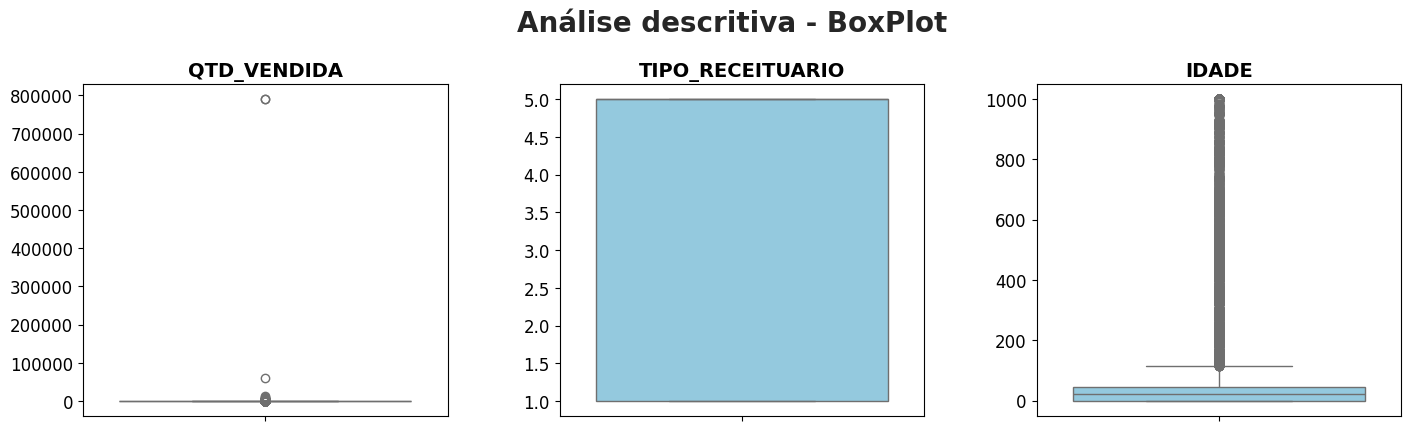

In [34]:
boxplot(df)

**Quantidade de vendas**
- Podemos observar que temos alguns outliers, sendo o mais discrepante deles com o valor de quase 800000.

**Tipo de receituário**
- Podemos notar que não temos outliers nessa coluna, todos os dados estão bem distribuídos.

**Idade**
- Podemos notar muitos outliers na idade, o que pode ser um erro de digitação das farmácias ou uma definição diferente no preenchimento de algumas localidades.

#### **Histograma**

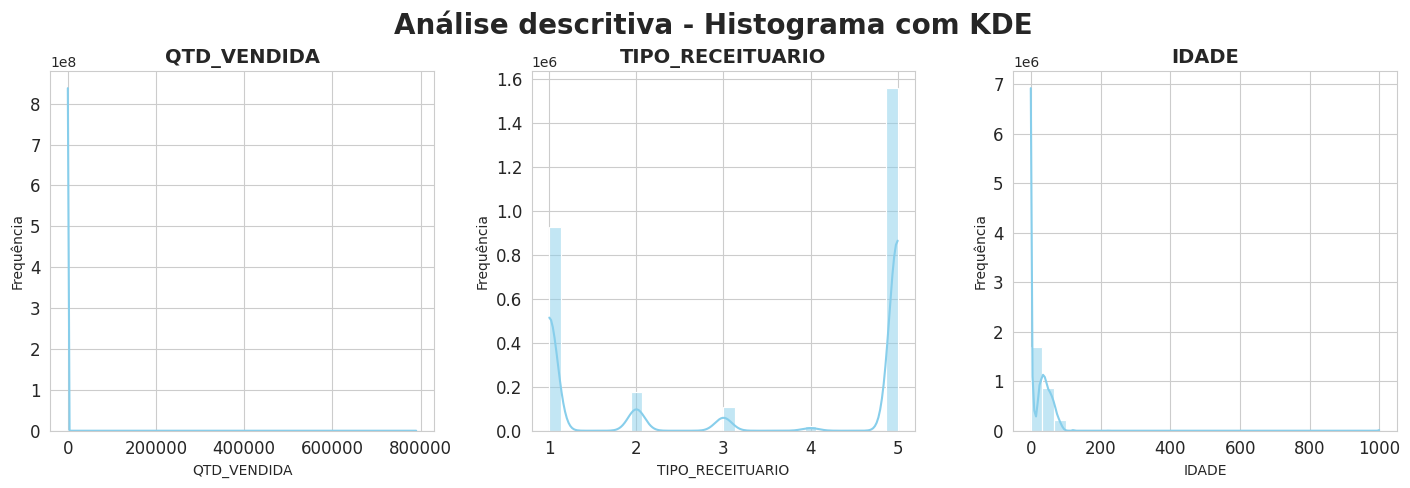

In [35]:
histograms(df)

- Como temos um valor de quase 800000 unidades em pelo menos uma compra, o histograma não fica bom, então vamos filtrar apenas as vendas com menos de 100 unidades.

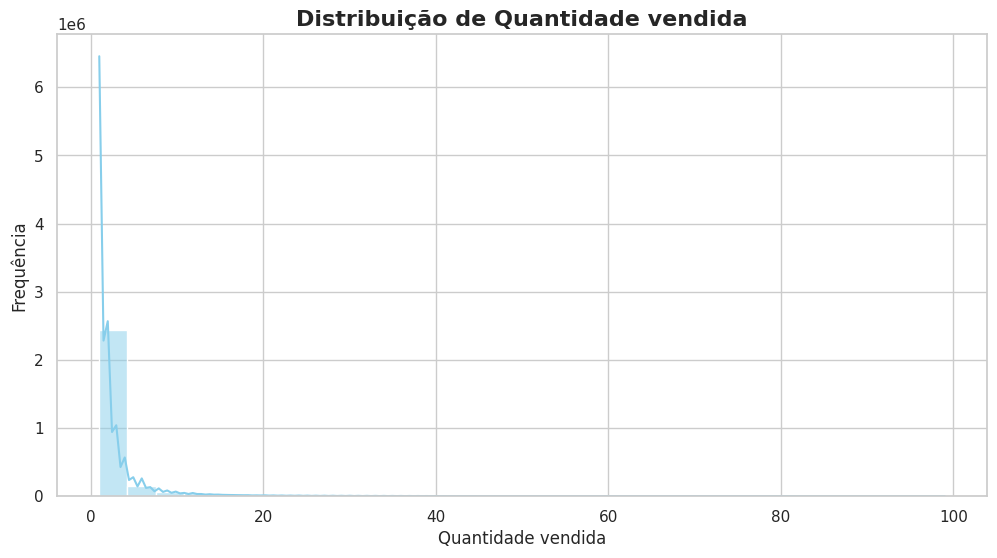

In [36]:
df_menos_100_vendas = df[df['QTD_VENDIDA'] < 100]

# configurando o estilo
sns.set(style="whitegrid")

# configurando o tamanho do gráfico
plt.figure(figsize=(12, 6))

# plotando o histograma com KDE
sns.histplot(data=df_menos_100_vendas, x='QTD_VENDIDA', kde=True, bins=30, color='skyblue')

# Ajustando títulos e rótulos
plt.title('Distribuição de Quantidade vendida', fontsize=16, fontweight='bold')
plt.xlabel('Quantidade vendida')
plt.ylabel('Frequência')

# Mostrar gráfico
plt.show()

- Idade também não ficou uma variável muito boa de ser visualizada, então vamos plota-la individualmente e com filtro para menos de 100 anos.

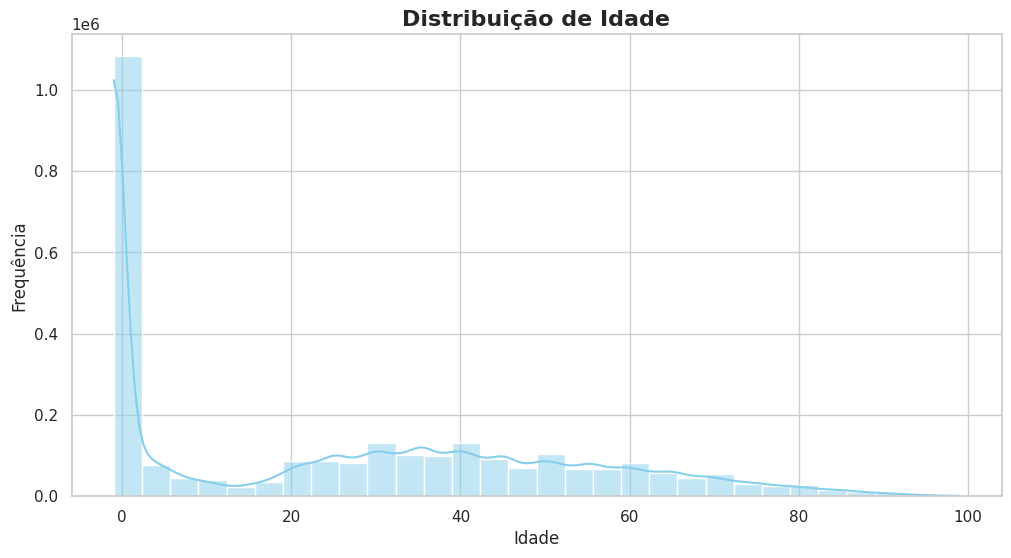

In [37]:
df_menos_100_anos = df[df['IDADE'] < 100]

# configurando o estilo
sns.set(style="whitegrid")

# configurando o tamanho do gráfico
plt.figure(figsize=(12, 6))

# plotando o histograma com KDE
sns.histplot(data=df_menos_100_anos, x='IDADE', kde=True, bins=30, color='skyblue')

# Ajustando títulos e rótulos
plt.title('Distribuição de Idade', fontsize=16, fontweight='bold')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Mostrar gráfico
plt.show()

**Quantidade vendida**
- A quantidade vendida está muito concentrada entre 0 e 5, mostrando que na grande maioria das vendas são vendidos poucos medicamentos.

**Tipo de receituário**
- A maior quantidade de tipos de receituários está concentrada em receitas antimicrobianos, seguidos de receitas de controle especial em duas vidas, que representam uma porcentagem muito grande das vendas.

**Idade**
- Apesar da maior parte das vendas estar concentrada próxima da idade 0 (provavelmente por causa do ajuste que fizemos preenchendo os nulos como -1), podemos observar que temos um número considerável de consumidores entre 20 e 60 anos.

### **Análise univariada das variáveis categóricas**

In [38]:
df.describe(include='object')

,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,SEXO
count,2785568,2785568,2785568,2785568,2785568,2785568,2785568,2785568
unique,27,4625,662,3681,2,4,27,3
top,SP,SÃO PAULO,AZITROMICINA DI-HIDRATADA,500 MG CAP DURA CT BL AL PLAS TRANS X 21,CAIXA,CRM,SP,Não informado
freq,585811,64833,177172,88157,2321681,2519364,590764,995525


**Análise Geográfica**
- Podemos observar que o estado que possui mais vendas é o estado de São Paulo, apresentando 585811 vendas;
- A cidade onde foram vendidos mais medicamentos foi a cidade de São Paulo, onde foram vendidos 64833 medicamentos.

**Princípio Ativo e Descrição dos medicamentos**
- Temos 662 tipos de princípio ativo diferentes, porém o remédio mais vendido possui como princípio ativo a Azitromicina Di-hidratada.
- De 3681 tipos de descrição, a mais vendida foi "500 MG CAP DURA CT BL AL PLAS TRANS X 21" com 88157 vendas;
- Foram realizadas 2321681 vendas de caixas de medicamentos.

**Conselho Prescritor**
- O estado que mais prescreveu medicamentos foi São Paulo com 590764 prescrições;
- Além disso, o conselho prescritor que mais prescreveu medicamentos foi o CRM, com 2519364 prescrições.

**Sexo**
- Na maioria das vendas não foi informado o sexo do cliente, provavelmente por serem remédios que não precisa de um controle mais rigoroso.

#### **Gráficos de frequências categóricas**

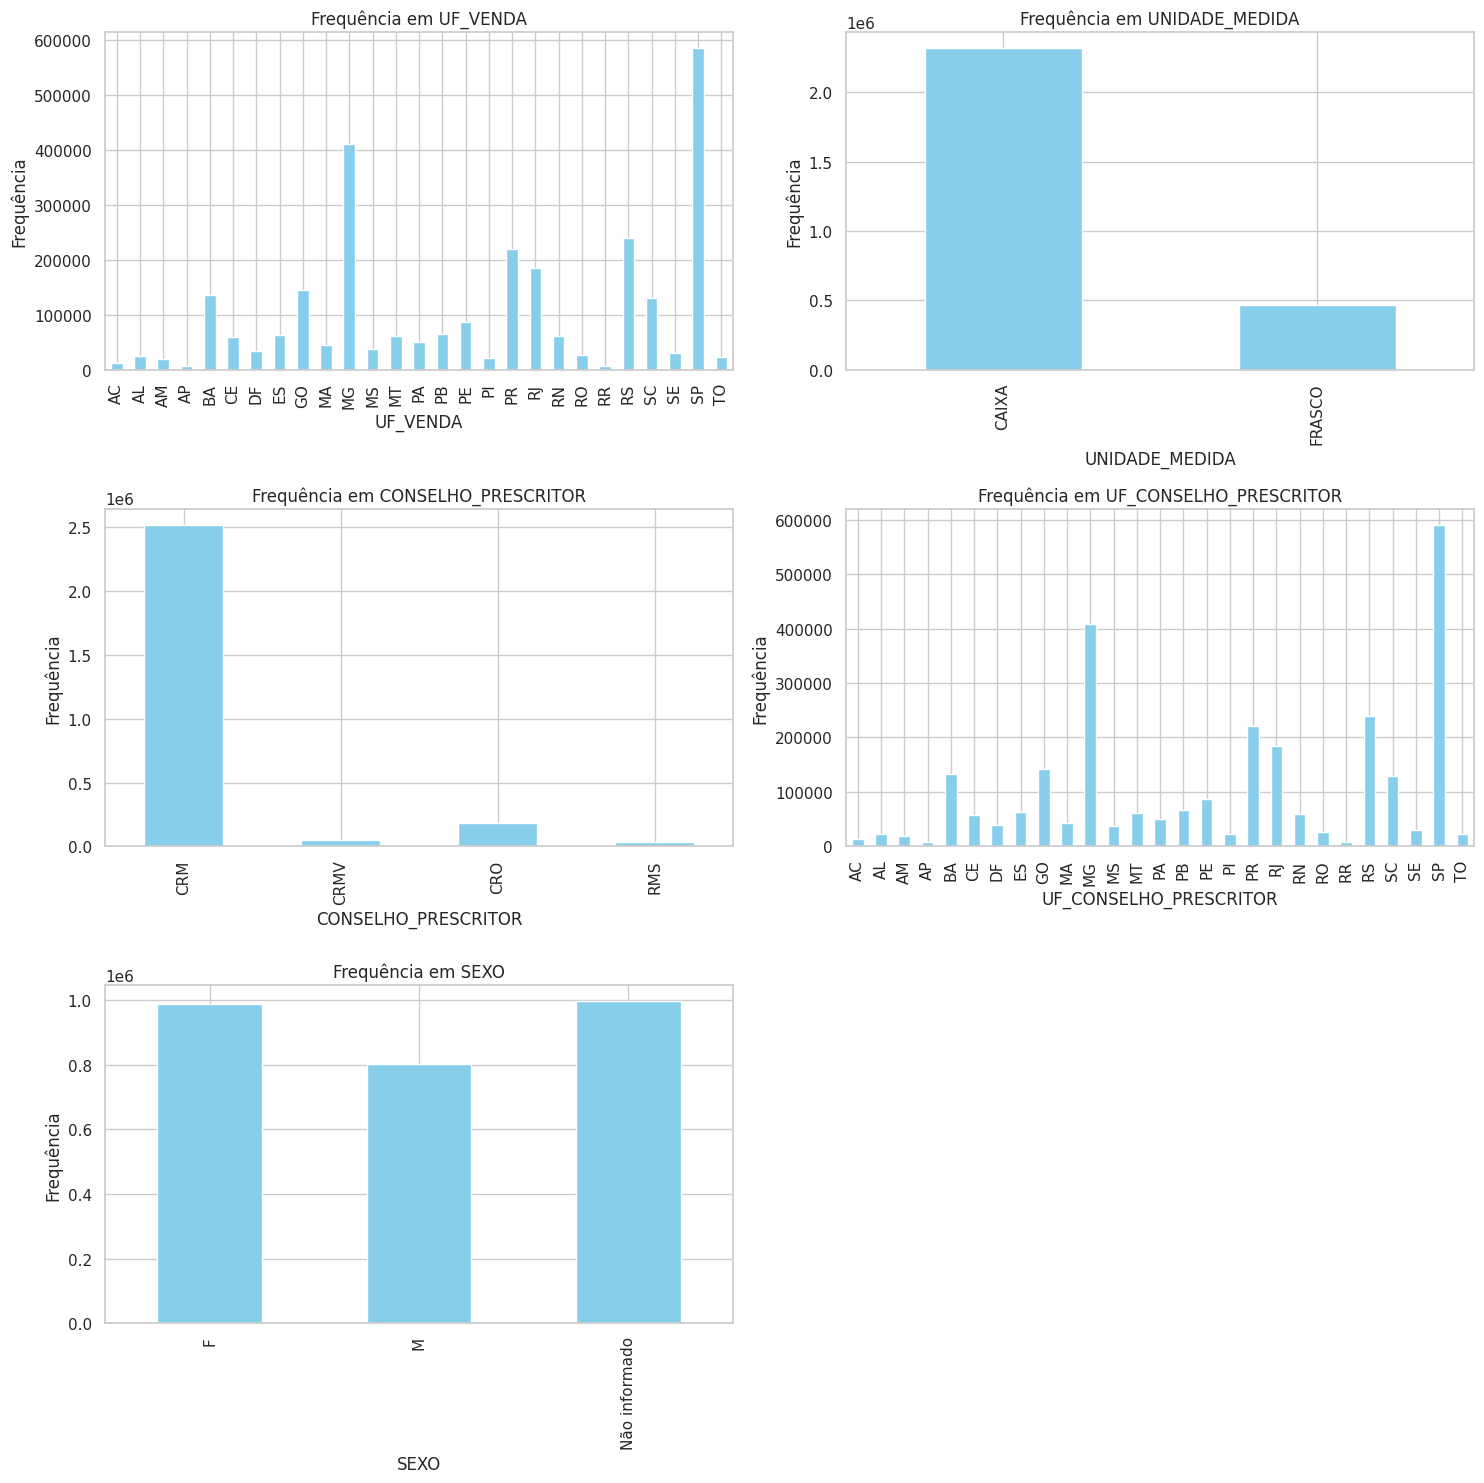

In [39]:
plot_categorical_frequency_pt(df, corte_cardinalidade=30, graficos_por_linha=2)

**Dados Regionais**
- Podemos observar que São Paulo foi o estado que mais vendeu, seguido de Minas Gerais. O mesmo pode ser observado na UF do conselho prescritor, que segue essa mesma tendência;

**Dados de sexo dos clientes**
- Também podemos observar que clientes do sexo feminino realizaram mais compras do que clientes do sexo masculino (se ignorarmos os clientes que não informaram);

**Dados das unidades de medidas**
- É possível observar que caixas de remédios foram muito mais vendidas do que frascos, provavelmente pela maioria dos remédios serem fabricados em caixas.

### **Análises Regionais**

Primeiro devemos classificar a região de cada venda baseado no estado.

In [40]:
mapeamento_regioes = {
    'AC': 'Norte',
    'AP': 'Norte',
    'AM': 'Norte',
    'PA': 'Norte',
    'RO': 'Norte',
    'RR': 'Norte',
    'TO': 'Norte',
    'AL': 'Nordeste',
    'BA': 'Nordeste',
    'CE': 'Nordeste',
    'MA': 'Nordeste',
    'PB': 'Nordeste',
    'PE': 'Nordeste',
    'PI': 'Nordeste',
    'RN': 'Nordeste',
    'SE': 'Nordeste',
    'DF': 'Centro-Oeste',
    'GO': 'Centro-Oeste',
    'MT': 'Centro-Oeste',
    'MS': 'Centro-Oeste',
    'ES': 'Sudeste',
    'MG': 'Sudeste',
    'RJ': 'Sudeste',
    'SP': 'Sudeste',
    'PR': 'Sul',
    'RS': 'Sul',
    'SC': 'Sul'
}

df['REGIAO_VENDA'] = df['UF_VENDA'].map(mapeamento_regioes)
df.head(10)

,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,SEXO,IDADE,REGIAO_VENDA
0,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5,M,37,Centro-Oeste
1,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5,M,40,Centro-Oeste
2,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,2,CAIXA,CRM,MT,5,M,45,Centro-Oeste
3,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,5,CAIXA,CRM,MT,5,F,34,Centro-Oeste
4,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5,F,36,Centro-Oeste
5,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,3,CAIXA,CRM,MT,5,F,54,Centro-Oeste
6,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5,F,67,Centro-Oeste
7,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,2,CAIXA,CRM,MT,5,F,68,Centro-Oeste
8,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5,F,73,Centro-Oeste
9,MT,TANGARÁ DA SERRA,SULFATO DE HIDROXICLOROQUINA,400 MG COM REV CT BL AL PLAS TRANS X 30,1,CAIXA,CRM,MT,1,Não informado,-1,Centro-Oeste


In [41]:
df['REGIAO_VENDA'].value_counts()

,count
REGIAO_VENDA,
Sudeste,1245529
Sul,590407
Nordeste,525647
Centro-Oeste,277513
Norte,146472


Antes de avaliarmos as vendas, devemos retirar os grandes outliers que irão impactar a análise.

Provavelmente esses outliers foram erros de digitação, então não devem interferir na análise.

In [42]:
df['QTD_VENDIDA'].value_counts().sort_index(ascending=False).head(10)

,count
QTD_VENDIDA,
789831,1
789626,1
60001,1
13192,1
9453,1
8043,1
7153,1
5188,1
5069,1


In [43]:
# pegando somente o dataframe sem as linhas acima de 100000 vendas
df = df[df['QTD_VENDIDA'] < 100000]

In [44]:
# agora vamos agrupar os dados e calcular as estatísticas desejadas de cada coluna
numero_vendas_por_regiao = df.groupby('REGIAO_VENDA').agg(
    Total_Medicamentos_Vendidos=('QTD_VENDIDA', 'sum'),
    Total_Vendas_Realizadas=('REGIAO_VENDA', 'count'),
    Media_Medicamentos_por_Venda=('QTD_VENDIDA', 'mean')
).reset_index()

# ordenando pelo total de vendas realizado
numero_vendas_por_regiao = numero_vendas_por_regiao.sort_values(by='Total_Vendas_Realizadas', ascending=False)

# criando a coluna de porcentagem de vendas
total_vendas = numero_vendas_por_regiao['Total_Vendas_Realizadas'].sum()
numero_vendas_por_regiao['%_vendas'] = round((numero_vendas_por_regiao['Total_Vendas_Realizadas'] / total_vendas) * 100,2).sort_values(ascending=False)

numero_vendas_por_regiao.reset_index(drop=True, inplace=True)
numero_vendas_por_regiao.index = numero_vendas_por_regiao.index+1
numero_vendas_por_regiao

,REGIAO_VENDA,Total_Medicamentos_Vendidos,Total_Vendas_Realizadas,Media_Medicamentos_por_Venda,%_vendas
1,Sudeste,4826878,1245529,3.875364,44.71
2,Sul,1734573,590406,2.937933,21.20
3,Nordeste,1970134,525646,3.748024,18.87
4,Centro-Oeste,971503,277513,3.500748,9.96
5,Norte,441283,146472,3.012746,5.26


#### **Análise por região**

**Sudeste**

- É o estado com o maior número de vendas, com 4826878 medicamentos vendidos em 1245529 vendas;
- Podemos dizer que em cada venda foram vendidos cerca de 4 medicamentos.
<br>

**Sul**
- É o segundo estado com mais vendas, onde foram realizadas 590406 vendas e vendidos 1734573 medicamentos;
- Cada venda vendeu em média 3 medicamentos.
<br>

**Nordeste**
- O Nordeste representa 18,87% das vendas, o que resulta em 525646 vendas e 1970134 medicamentos vendidos;
- Apesar de ter menos vendas do que o Sul, o Nordeste vendeu mais medicamentos, chegando a uma média de 3,74 medicamentos por venda.
<br>

**Centro-oeste e Norte**
- O Centro-oeste e o Norte representam juntos apenas 15,22% das vendas, o que representa 423985 vendas e 1412786 medicamentos vendidos;
- Apesar de terem uma quantidade de vendas pequena, a média de medicamentos vendida por venda é maior do que 3, não ficando muito abaixo das outras regiões.


#### **Análise gráfica por região**

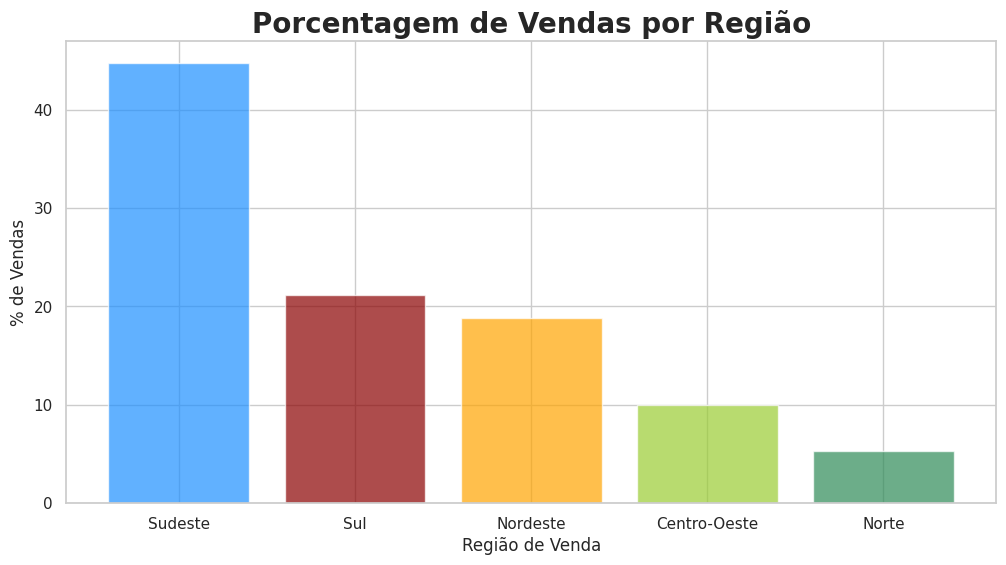

In [45]:
plt.figure(figsize=(12, 6))

regioes = ['Sudeste', 'Sul', 'Nordeste', 'Centro-Oeste', 'Norte']
cores_regioes = {
    'Norte': '#2E8B57',        # verde escuro
    'Nordeste': '#FFA500',     # laranja
    'Centro-Oeste': '#9ACD32', # verde claro/oliva
    'Sudeste': '#1E90FF',      # azul
    'Sul': '#8B0000'           # vermelho escuro
}


# gerando a lista de cores na mesma ordem dos dados
cores = [cores_regioes[r] for r in regioes]

plt.bar(numero_vendas_por_regiao["REGIAO_VENDA"], numero_vendas_por_regiao["%_vendas"], color=cores, alpha=0.7)

plt.xlabel("Região de Venda", fontsize=12)
plt.ylabel("% de Vendas", fontsize=12)
plt.title("Porcentagem de Vendas por Região", fontsize=20, fontweight='bold')

plt.show()

### **Análise por estado**

#### **Quantidade total de vendas por estado**

In [46]:
numero_vendas_uf = df.groupby('UF_VENDA').agg(
    Quantidade_Medicamentos_Vendidos=('QTD_VENDIDA', 'sum'),
    Quantidade_Vendas_Realizadas=('UF_VENDA', 'count'),
    Media_Medicamentos_por_Venda=('QTD_VENDIDA', 'mean')
).reset_index()

numero_vendas_uf = numero_vendas_uf.sort_values(by='Quantidade_Medicamentos_Vendidos', ascending=False)
numero_vendas_uf.reset_index(drop=True, inplace=True)
numero_vendas_uf.index = numero_vendas_uf.index+1
numero_vendas_uf

,UF_VENDA,Quantidade_Medicamentos_Vendidos,Quantidade_Vendas_Realizadas,Media_Medicamentos_por_Venda
1,SP,2254613,585811,3.848704
2,MG,1404146,411555,3.411806
3,RJ,947258,185604,5.103651
4,RS,752836,240057,3.136072
5,PR,596272,220290,2.706759
6,GO,514246,144917,3.548555
7,BA,406689,135862,2.993398
8,SC,385465,130059,2.963770
9,PE,347982,87408,3.981123
10,CE,269038,58368,4.609341


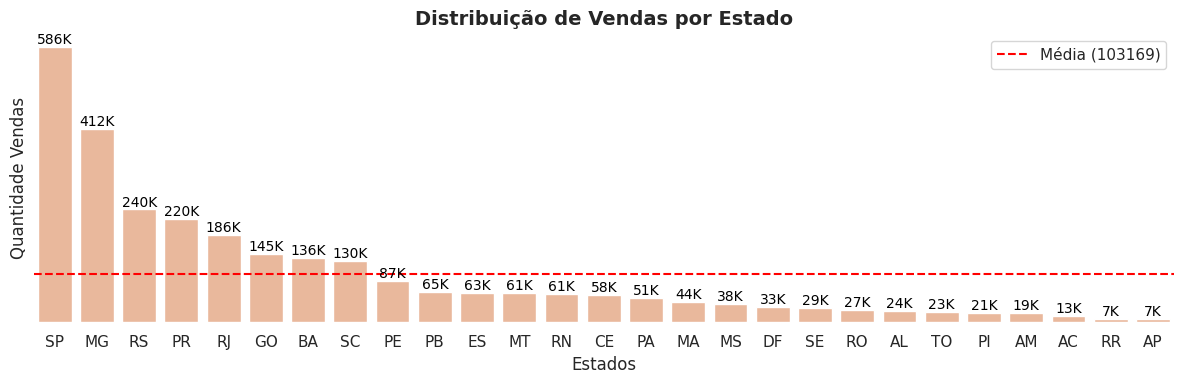

In [47]:
# Calculando a quantidade de vendas realizadas por estado
contagem_estados = df['UF_VENDA'].value_counts()
total_vendas = contagem_estados.sum()
media_vendas = total_vendas / len(contagem_estados)

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(12, 4))

bar_color = sns.color_palette("rocket_r")[0]
sns.barplot(x=contagem_estados.index, y=contagem_estados.values, color=bar_color, ax=ax)

# Adicionando os valores nas barras formatados
for p in ax.patches:
    height = p.get_height()
    if height >= 1000:
        formatted_value = f'{height/1000:.0f}K'  # Exibe milhares com um "K" no final
    else:
        formatted_value = f'{height:.0f}'  # Exibe outros números inteiros

    ax.annotate(f'{formatted_value}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Linha média
ax.axhline(y=media_vendas, color='red', linestyle='--', label=f'Média ({media_vendas:.0f})')

# Removendo as linhas de grade do eixo y
ax.yaxis.grid(False)

# Removendo a escala do eixo y
plt.yticks([])

# Ocultando as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

plt.title('Distribuição de Vendas por Estado', weight='bold', fontsize=14)

plt.xlabel('Estados', fontsize=12)
plt.ylabel('Quantidade Vendas', fontsize=12)

plt.tight_layout()
plt.legend()
plt.show()

**Análise da distribuição**
- Podemos observar que São Paulo lidera o rank de vendas com uma grande vantagem, e já que temos uma quantidade pequena de estados (27), isso faz com que com que São Paulo puxe a média muito para cima, deixando 19 estados com a quantidade de vendas abaixo da média.

#### **Média de itens por venda por estado**

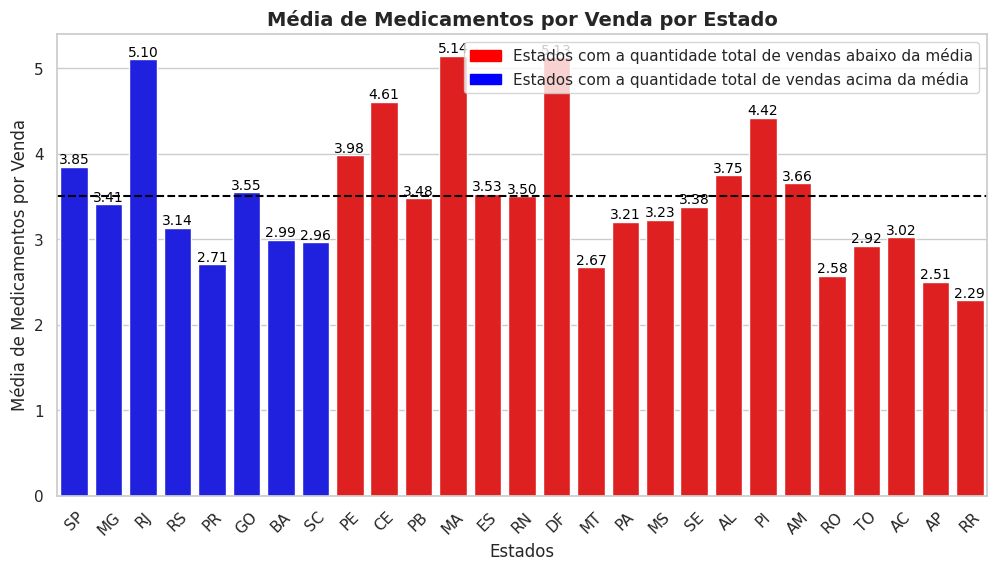

In [48]:
media_vendas_realizadas = numero_vendas_uf["Quantidade_Vendas_Realizadas"].mean()

# Criando uma lista de cores baseada na condição de vendas abaixo da média
colors = ["red" if vendas < media_vendas_realizadas else "blue" for vendas in numero_vendas_uf["Quantidade_Vendas_Realizadas"]]
sns.set_style("whitegrid")


fig, ax = plt.subplots(figsize=(12, 6))

# Criando as barras com cores dinâmicas
sns.barplot(x=numero_vendas_uf["UF_VENDA"], y=numero_vendas_uf["Media_Medicamentos_por_Venda"], palette=colors, ax=ax)

# Adicionando os rotulos nas barras formatados
for p in ax.patches:
    height = p.get_height()
    formatted_value = f'{height:.2f}'  # Exibe com 2 casas decimais

    ax.annotate(f'{formatted_value}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

media_geral = numero_vendas_uf["Media_Medicamentos_por_Venda"].mean()
ax.axhline(y=media_geral, color='black', linestyle='--', linewidth=1.5, label=f'Média Geral: {media_geral:.2f}')

# alterando os labels, titulo e valores
plt.xticks(rotation=45)  # Rotacionando os estados para melhor legibilidade
plt.xlabel('Estados', fontsize=12)
plt.ylabel('Média de Medicamentos por Venda', fontsize=12)
plt.title('Média de Medicamentos por Venda por Estado', weight='bold', fontsize=14)

# definindo titulos e cores da legenda
label_red = "Estados com a quantidade total de vendas abaixo da média"
label_blue = "Estados com a quantidade total de vendas acima da média"
from matplotlib.patches import Patch
legend_patches = [Patch(color='red', label=label_red), Patch(color='blue', label=label_blue)]
plt.legend(handles=legend_patches)

plt.show()

- No gráfico temos em azul os estados que atingiram a média de vendas e em vermelho os estados que não atingiram a média de vendas;

- Podemos observar que vários estados que estavam abaixo da média de vendas estão acima da média de medicamentos vendidos por venda, ou seja, apesar desses estados realizarem poucas vendas, na média eles venderam mais medicamentos por venda do que alguns estados que realizaram muitas vendas.

### **Analisando os produtos mais vendidos**

#### **Por total de vendas**

In [49]:
# criando uma df dos 10 medicamentos que mais aparecem em vendas
df_vendas_medicamento = df.groupby('PRINCIPIO_ATIVO').agg(
    Total_Medicamentos_Vendidos=('QTD_VENDIDA', 'sum'),
    Total_Vendas_Realizadas=('PRINCIPIO_ATIVO', 'count')).reset_index()

df_vendas_medicamento = df_vendas_medicamento.sort_values(by='Total_Vendas_Realizadas', ascending=False)
df_vendas_medicamento.reset_index(drop=True, inplace=True)
df_vendas_medicamento.index = df_vendas_medicamento.index+1
df_top_10_vendas = df_vendas_medicamento.head(10)
df_top_10_vendas


,PRINCIPIO_ATIVO,Total_Medicamentos_Vendidos,Total_Vendas_Realizadas
1,AZITROMICINA DI-HIDRATADA,290396,177172
2,AMOXICILINA TRI-HIDRATADA,197832,118605
3,AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POT...,168434,99709
4,AMOXICILINA + CLAVULANATO DE POTÁSSIO,123692,78294
5,CLONAZEPAM,615944,66839
6,CEFALEXINA MONOIDRATADA,196229,66354
7,OXALATO DE ESCITALOPRAM,406316,62885
8,CEFALEXINA,173190,62051
9,CLORIDRATO DE CIPROFLOXACINO,102499,59556
10,AMOXICILINA,88177,57420


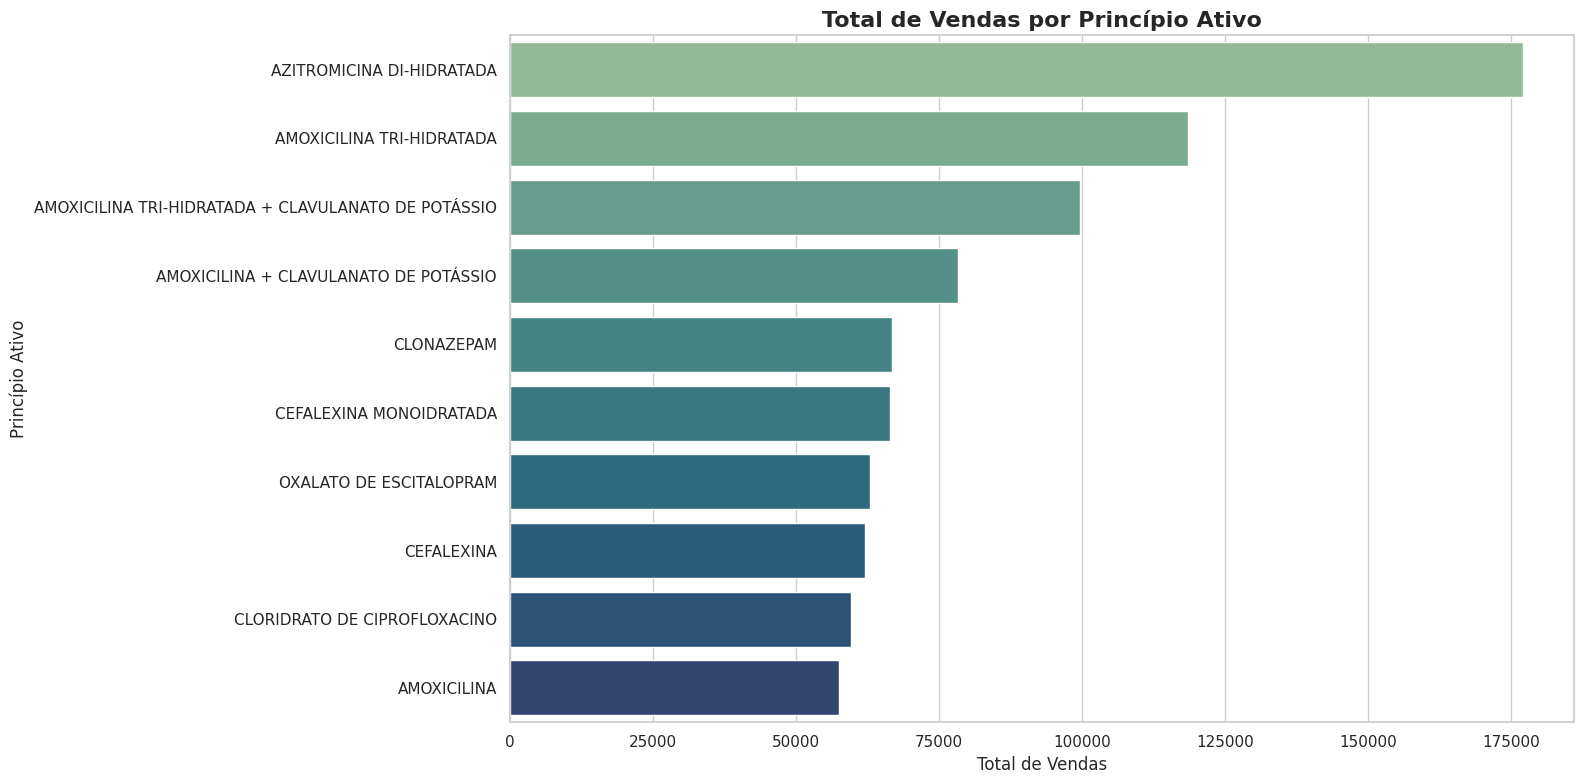

In [50]:
plt.figure(figsize=(16, 8))
sns.barplot(
    data=df_top_10_vendas,
    x='Total_Vendas_Realizadas',
    y='PRINCIPIO_ATIVO',
    palette='crest'
)


plt.xlabel('Total de Vendas', fontsize=12)
plt.ylabel('Princípio Ativo', fontsize=12)
plt.title('Total de Vendas por Princípio Ativo', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

- Podemos observar que a Azitromicina di-hidratada aparece no top 1, provavelmente porque é um antibiótico utilizado para diversos tipos de infecções, como: infecções respiratórias, de garganta, de pele e tecidos moles, além de otite média e algumas DST's;

- Em segundo lugar temos a Amoxilina tri-hidratada, que também é utilizada para tratar infecções respiratórias, otite média e infecções de pele, mas além disso também pode tratar infecções urinárias;

- Em terceiro lugar temos um medicamento com dois princípios ativos, contendo Amoxicilina Tri-Hidratada + Clavulanato de potássio. Esse medicamento trata as mesmas infecções tratadas com amoxicilina, mas com suspeita de resistência bacterianas. Porém essa medicação pode causar mais efeitos colaterais gastrointestinais (náusea, diarreia).


#### **Por total de medicamentos vendidos**

In [51]:
# criando um df dos 10 medicamentos mais vendidos
df_vendas_medicamento = df_vendas_medicamento.sort_values(by='Total_Medicamentos_Vendidos', ascending=False)
df_vendas_medicamento.reset_index(drop=True, inplace=True)
df_vendas_medicamento.index = df_vendas_medicamento.index+1
df_top_10_medicamentos = df_vendas_medicamento.head(10)
df_top_10_medicamentos

,PRINCIPIO_ATIVO,Total_Medicamentos_Vendidos,Total_Vendas_Realizadas
1,CLONAZEPAM,615944,66839
2,OXALATO DE ESCITALOPRAM,406316,62885
3,HEMITARTARATO DE ZOLPIDEM,398932,46319
4,ALPRAZOLAM,380913,45187
5,CLORIDRATO DE SERTRALINA,351887,44904
6,HEMIFUMARATO DE QUETIAPINA,298832,36462
7,AZITROMICINA DI-HIDRATADA,290396,177172
8,PREGABALINA,238674,36687
9,CLORIDRATO DE AMITRIPTILINA,229390,27870
10,CLORIDRATO DE FLUOXETINA,217765,29109


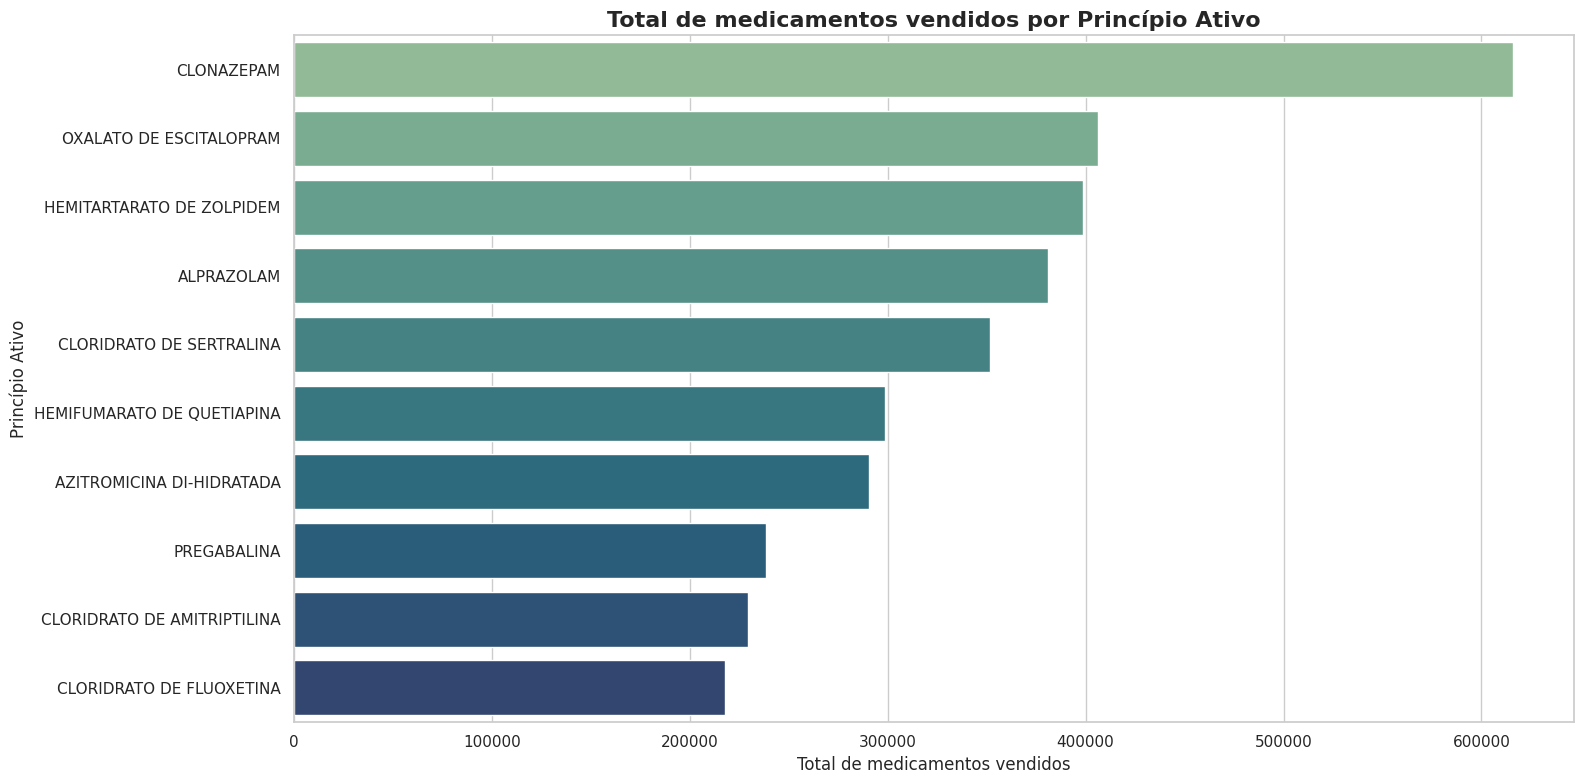

In [52]:
plt.figure(figsize=(16, 8))
sns.barplot(
    data=df_top_10_medicamentos,
    x='Total_Medicamentos_Vendidos',
    y='PRINCIPIO_ATIVO',
    palette='crest'
)


plt.xlabel('Total de medicamentos vendidos', fontsize=12)
plt.ylabel('Princípio Ativo', fontsize=12)
plt.title('Total de medicamentos vendidos por Princípio Ativo', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

- Apesar de não aparecer em tantas vendas quanto a Azitromicina di-hidratada, o Clonazepam foi o medicamento com mais caixas compradas, com mais de 600 mil unidades vendidas;

- Esse medicamento é utilizado para Crises convulsivas/Epilepsia, Transtorno de ansiedade, Síndrome do pânico, Distúrbios do sono, Síndrome das pernas inquietas e Distúrbios do movimento;

- Percebe-se que o medicamento mais vendido é voltado ao tratamento de transtornos mentais, o que levanta um alerta sobre a importância de cuidar da **saúde mental** antes que seja necessário recorrer a esse tipo de intervenção.

### **Análise do total de vendas por idade**

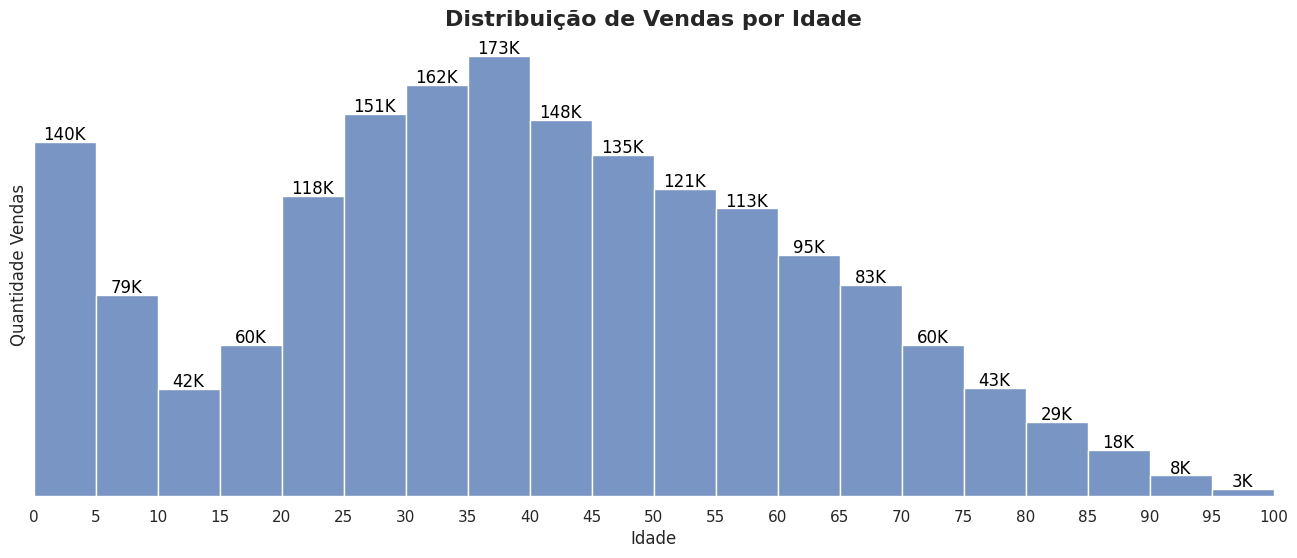

In [53]:
df_idade = df.copy()
df_idade = df_idade[(df_idade['IDADE'] >= 0) & (df_idade['IDADE'] <= 100) ]

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(16, 6))
sns.histplot(data=df_idade, x='IDADE', bins=20, palette='crest')

ax.set_xlim(0, 100)

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.yticks([])

for p in ax.patches:
    height = p.get_height()
    if height >= 1000:
        formatted_value = f'{height/1000:.0f}K'  # Exibe milhares com um "K" no final
    else:
        formatted_value = f'{height:.0f}'  # Exibe outros números inteiros

    ax.annotate(f'{formatted_value}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribuição de Vendas por Idade', weight='bold', fontsize=16)

plt.xlabel('Idade', fontsize=12)
plt.ylabel('Quantidade Vendas', fontsize=12)

for spine in ax.spines.values():
    spine.set_visible(False)

# Define os intervalos no eixo x de 5 em 5
ax.xaxis.set_major_locator(plt.MultipleLocator(base=5))

plt.show()

Nessa representação foram utilizados os dados das pessoas entre 0 e 100 anos, excluindo os dados onde estavam em branco ou o valor excede 100 anos.

- A faixa de idade onde tivemos a maior parte das vendas foram pessoas entre 35 e 40;

- A maior parte da quantidade de vendas está concentrada em pessoas economicamente ativas, de 20 a 60 anos;

- Porém crianças de 0 a 5 anos também apresentam um número elevado de compras, o que é esperado, já que crianças nessa idade ficam doentes com frequência, devido ao sistema imune ainda estar se desenvolvendo.

### **Análise multivariada**

#### **Medicamentos mais vendidos por faixa de idade**

In [54]:
bins = list(range(0, 110, 10))  # Vai de 0 até 100, último intervalo 100+
labels = [f'{i}-{i+10}' for i in range(0, 100, 10)]

# Criando a coluna de faixa etária
df['faixa_etaria'] = pd.cut(df['IDADE'], bins=bins, labels=labels, right=False, include_lowest=True)
df.head()

,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,SEXO,IDADE,REGIAO_VENDA,faixa_etaria
0,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5,M,37,Centro-Oeste,30-40
1,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5,M,40,Centro-Oeste,40-50
2,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,2,CAIXA,CRM,MT,5,M,45,Centro-Oeste,40-50
3,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,5,CAIXA,CRM,MT,5,F,34,Centro-Oeste,30-40
4,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5,F,36,Centro-Oeste,30-40


In [55]:
vendas_faixa_etaria = df.groupby(['faixa_etaria', 'PRINCIPIO_ATIVO']).agg(
    total_vendas=('QTD_VENDIDA', 'sum')).reset_index()

# Ordenando os dados por faixa etária e quantidade de vendas em ordem decrescente
vendas_faixa_etaria = vendas_faixa_etaria.sort_values(by=['faixa_etaria', 'total_vendas'], ascending=[True, False])

# Filtrando o top 3 por faixa etária
vendas_faixa_etaria['rank'] = vendas_faixa_etaria.groupby('faixa_etaria')['total_vendas'].rank(method='first', ascending=False)

# Mantendo apenas o top 3 por faixa etária
top_por_faixa = vendas_faixa_etaria[vendas_faixa_etaria['rank'] == 1].reset_index(drop=True)
top_por_faixa.index = top_por_faixa.index+1
top_por_faixa

,faixa_etaria,PRINCIPIO_ATIVO,total_vendas,rank
1,0-10,AZITROMICINA DI-HIDRATADA,52821,1.0
2,10-20,AZITROMICINA DI-HIDRATADA,20148,1.0
3,20-30,DEXAMETASONA + TOBRAMICINA,62144,1.0
4,30-40,AZITROMICINA DI-HIDRATADA,56681,1.0
5,40-50,AZITROMICINA DI-HIDRATADA,42524,1.0
6,50-60,AZITROMICINA DI-HIDRATADA,29958,1.0
7,60-70,AZITROMICINA DI-HIDRATADA,19536,1.0
8,70-80,CEFALEXINA MONOIDRATADA,9700,1.0
9,80-90,CEFALEXINA MONOIDRATADA,4630,1.0
10,90-100,NITROFURANTOÍNA,1182,1.0


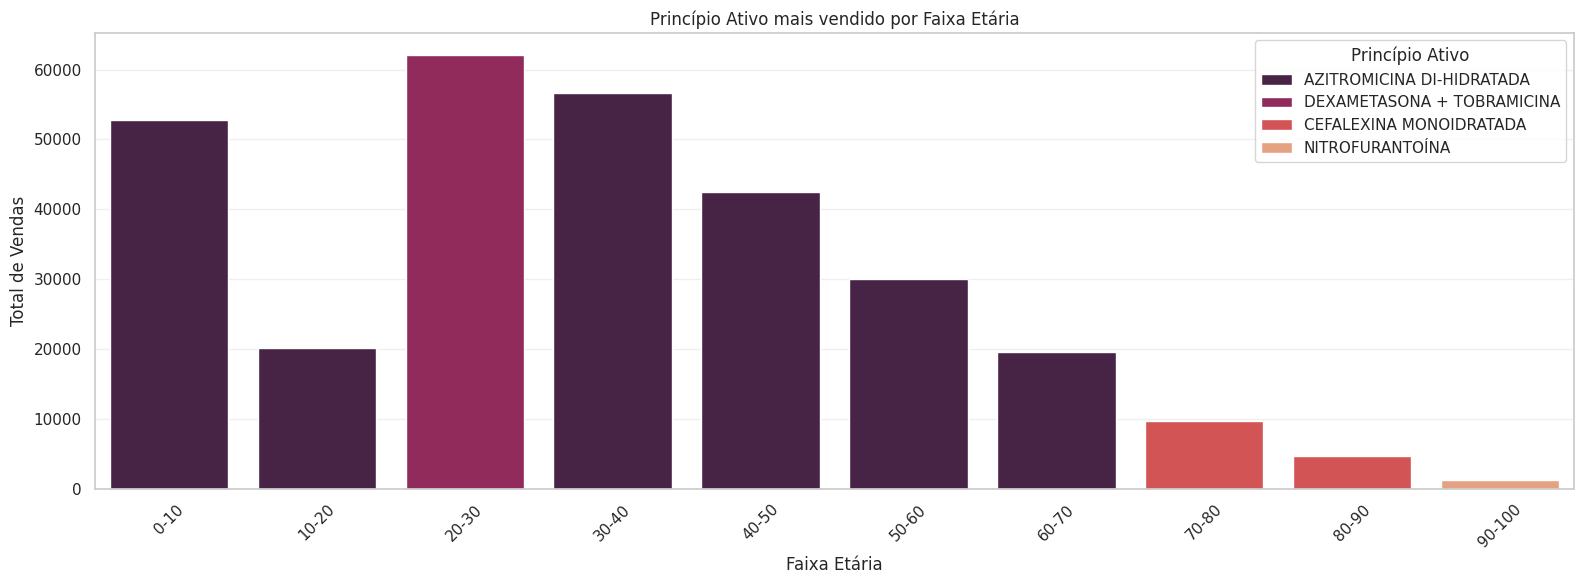

In [56]:
plt.figure(figsize=(16, 6))
sns.barplot(
    data=top_por_faixa,
    x='faixa_etaria',
    y='total_vendas',
    hue='PRINCIPIO_ATIVO',
    palette='rocket'
)

plt.title('Princípio Ativo mais vendido por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Total de Vendas')
plt.legend(title='Princípio Ativo')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

- A Azitromicina é o medicamento mais vendido para diversas faixas etárias diferentes. O que pode ajudar a explicar isso é que este é o medicamento mais indicado para infecções respiratórias ou de garganta, o que são doenças muito comuns e que atingem grande parte da população;

- Já para pessoas entre 20 e 30 anos, o mais princípio ativo mais vendido é Dexametasona + Tobramicina, um medicamento utilizado para tratar inflamações oculares, conjuntivite e em alguns casos após cirurgias oculares;

- Já entre 70 e 90 anos, o medicamento mais vendido é a Cefalexina monoidratada, que é um antibiótico eficaz e com baixo risco de toxicidade, se comparado a antibióticos mais fortes, por isso é indicado para idosos;

- Já para idosos entre 90 e 100 anos, o mais vendido é a Nitrofurantoína, que é um medicamente utilizado para o tratamento de infecções urinárias e provavelmente é recomendado para idosos pois tem baixo risco de resistência bacteriana comparada a outros antibióticos.

## **CONCLUSÃO**

## **Insights e Recomendações**

### **Insights**

- A Azitromicina di-hidratada foi o medicamento que mais apareceu em vendas, com um total de 177172, o que mostra que infecções respiratórias e de garganta provavelmente são as doenças mais comuns na maior parte da população;

- Clonazepam foi o medicamento mais vendido, com 615944 caixas vendidas;

- Medicamentos em caixas foram mais vendidos, com um total de 2321679 caixas vendidas;

- A região sudeste é a que mais realiza vendas de medicamentos, com um total de 44,71% de todas as compradas, seguida pelo sul, com um total de 21,2%;

- O estado que mais vende medicamentos é o estado de São Paulo, com 587 mil vendas;

- O estado do Maranhão é o estado que vende mais medicamentos por compra, com uma média de 5,14 medicamentos/compra, seguido do Distrito Federal com 5,13 e Rio de Janeiro com 5,10;

- Já os estados com menos vendas foram o Amapá e Roraima, com cerca de 7 mil vendas cada;

- Além disso, o Amapá e Roraima também são os estados com menos medicamentos vendidos por venda;

- A faixa de idade que mais realizou compras de medicamentos foram pessoas entre 35 e 40 anos;

- O remédio com o princípio ativo mais vendido foi a Azitromicina di-hidratada, liderando quase todas as faixas etárias;

- Pessoas entre 20 e 60 anos (geralmente são economicamente ativas) possuem a grande maioria das vendas de medicamentos.


### **Recomendações**

#### **Recomendação Geografica**

- Reforce o planejamento logístico para garantir alta disponibilidade nos estados mais populosos e com maior saída, como SP, RJ e MG;

- Reavalie a distribuição em áreas de baixa penetração para reduzir perdas e alinhar expectativa de estoque à demanda real (ex: Amapá e Roraima);

- Intensifique campanhas e presença comercial na região Sudeste, especialmente em São Paulo, responsável por quase 600 mil vendas;

- Explore oportunidades de venda por volume em Maranhão, DF e Rio de Janeiro, onde a média de medicamentos por compra é maior (acima de 5 por venda);

- Avalie estratégias de captação de mercado nos estados com menor volume, como Amapá e Roraima, com ações promocionais e apoio a farmácias locais.
<br><br>

#### **Segmentação de Público e Comunicação**

- Foque a comunicação em pessoas de 20 a 60 anos, que concentram a maioria das vendas, pois são economicamente ativas e têm maior acesso à compra;

- Crie campanhas direcionadas para a faixa entre 35 e 40 anos, que foi a que mais comprou medicamentos;

- Personalize materiais de marketing digital e pontos de venda para condições comuns dessa faixa etária: ansiedade, infecções, imunidade, dores musculares.
<br><br>

#### **Comercial e Vendas**

- Estabeleça meta regional diferenciada para os estados com maior ticket por compra (MA, DF, RJ), com incentivo a combos ou kits de medicamentos;

- Avalie o potencial de programas de fidelização e assinatura para consumidores frequentes de medicamentos controlados ou de uso contínuo.
<br><br>

#### **Pessoas**

- O Clonazepam foi o medicamento mais vendido, e por ser utilizado no tratamento de transtornos mentais, isso reforça a importância de cuidarmos melhor da saúde mental no dia a dia, para que situações mais graves, que exigem o uso de medicação, possam ser evitadas;

- A Azitromicina di-hidratada apareceu em mais vendas que qualquer outro medicamento, o que mostra que é importante promover campanhas de conscientização sobre saúde respiratória, especialmente em períodos de maior incidência de doenças respiratórias (outono/inverno);